In [1]:
import pandas as pd

In [2]:
import yfinance as yf

## Data Management

### Storing Inputs

**Enter Date range from start to end, Stock, Benchmark:**

In [6]:
start_date = "2022-01-01"
end_date = "2024-12-31"
ticker = "PLTR"
bm_ticker = "^GSPC"
window = 90

In [7]:
def storing_inputs(start_date, end_date, ticker, bm_ticker):
    # Define the start and end dates (yyyy-mm-dd)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Calculate the difference in months
    months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

    stock_data = yf.download(ticker, start=start_date, end=end_date)

    bm_data = yf.download(bm_ticker, start=start_date, end=end_date)

    return stock_data, bm_data

In [8]:
# Correct way to call the function and store results
stock_data, bm_data = storing_inputs(start_date, end_date, ticker, bm_ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Data Preparation

In [10]:
# Function to prepare initial data:
def prepare(df,window):
    
    df = stock_data[['Close', 'High', 'Low', 'Open', 'Volume']]
    
    # Check if the columns are multi-level (i.e., tuples)
    if isinstance(df.columns[0], tuple):
        # Flatten multi-level columns and remove the ticker
        df.columns = [col[0] for col in df.columns]

    
    # Only calculate columns if they don't already exist to avoid overwriting NaNs | OVERWRITING PREVENTION
    if 'HL' not in df.columns:
        df['HL'] = df['High'] - df['Low']
    if 'OC' not in df.columns:
        df['OC'] = df['Close'] - df['Open']
    if '9D_Rolling_Volatility' not in df.columns:
        df['90D_Rolling_Volatility'] = df['Close'].pct_change().rolling(window=window).std()
    if 'hl-oc' not in df.columns:
        df['hl-oc'] = df['HL'] - df['OC']
    # Flatten multi-level columns and remove the ticker (second part of the tuple)
    return df

In [11]:
df = prepare(stock_data, window)
df.head(10)

,Close,High,Low,Open,Volume,HL,OC,90D_Rolling_Volatility,hl-oc
Date,,,,,,,,,
2022-01-03 00:00:00+00:00,18.530001,18.569000,17.860001,18.360001,34283600,0.709000,0.170000,NaN,0.539000
2022-01-04 00:00:00+00:00,18.170000,18.840000,17.790001,18.610001,39643200,1.049999,-0.440001,NaN,1.490000
2022-01-05 00:00:00+00:00,16.959999,18.568001,16.870001,18.030001,58445900,1.698000,-1.070002,NaN,2.768002
2022-01-06 00:00:00+00:00,16.740000,17.180000,16.055000,16.870001,49737100,1.125000,-0.130001,NaN,1.255001
2022-01-07 00:00:00+00:00,16.559999,17.330000,16.475000,16.700001,37989300,0.855000,-0.140001,NaN,0.995001
2022-01-10 00:00:00+00:00,16.500000,16.570000,15.350000,16.190001,77649400,1.219999,0.309999,NaN,0.910000
2022-01-11 00:00:00+00:00,16.889999,17.250000,16.320000,16.400000,47442600,0.930000,0.490000,NaN,0.440001
2022-01-12 00:00:00+00:00,16.719999,17.459999,16.400000,17.160000,39784200,1.059999,-0.440001,NaN,1.500000
2022-01-13 00:00:00+00:00,16.010000,16.820000,15.940000,16.799999,35492200,0.880000,-0.789999,NaN,1.669999


In [12]:
#stock_data1.dtypes

In [13]:
#type(df.index)

In [14]:
df.tail()

,Close,High,Low,Open,Volume,HL,OC,90D_Rolling_Volatility,hl-oc
Date,,,,,,,,,
2024-12-23 00:00:00+00:00,80.690002,82.019997,77.410004,80.650002,93819500,4.609993,0.040001,0.040346,4.569992
2024-12-24 00:00:00+00:00,82.379997,84.796997,81.000000,81.089996,64983300,3.796997,1.290001,0.040322,2.506996
2024-12-26 00:00:00+00:00,82.139999,83.489998,81.300003,83.160004,60377100,2.189995,-1.020004,0.040350,3.209999
2024-12-27 00:00:00+00:00,79.080002,82.000000,77.930000,81.419998,66975900,4.070000,-2.339996,0.040634,6.409996
2024-12-30 00:00:00+00:00,77.180000,79.239998,76.110001,77.040001,60850900,3.129997,0.139999,0.040798,2.989998


### Preparing after Benchmark data

In [16]:
def benchmark(bm, window):
    bm = bm_data['Close']
    
    # Rename the benchmark column (assuming it's the only column in the DataFrame)
    bm.columns = ['Benchmark']

    # To add columns from one DataFrame to another, you use axis=1 in pd.concat() or similar functions. This ensures the new DataFrame is added side by side.
    df1 = pd.concat([df,bm], axis=1) 

    # Calculate daily returns for both stock and benchmark
    df1['Stock_Return'] = df["Close"].pct_change()
    df1['Benchmark_Return'] = bm["Benchmark"].pct_change()
    
    # Calculate rolling covariance and rolling variance
    df1['Rolling_Covariance'] = df1['Stock_Return'].rolling(window=window).cov(df1['Benchmark_Return'])
    df1['Rolling_Benchmark_Variance'] = df1['Benchmark_Return'].rolling(window=window).var()
    
    # Calculate rolling beta: Covariance / Variance
    df1['Rolling_Beta'] = df1['Rolling_Covariance'] / df1['Rolling_Benchmark_Variance']

    return df1

In [17]:
df_final = benchmark(bm_data, window)

In [18]:
df_final.head(5)

,Close,High,Low,Open,Volume,HL,OC,90D_Rolling_Volatility,hl-oc,Benchmark,Stock_Return,Benchmark_Return,Rolling_Covariance,Rolling_Benchmark_Variance,Rolling_Beta
Date,,,,,,,,,,,,,,,
2022-01-03 00:00:00+00:00,18.530001,18.569000,17.860001,18.360001,34283600,0.709000,0.170000,NaN,0.539000,4796.560059,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00+00:00,18.170000,18.840000,17.790001,18.610001,39643200,1.049999,-0.440001,NaN,1.490000,4793.540039,-0.019428,-0.000630,NaN,NaN,NaN
2022-01-05 00:00:00+00:00,16.959999,18.568001,16.870001,18.030001,58445900,1.698000,-1.070002,NaN,2.768002,4700.580078,-0.066593,-0.019393,NaN,NaN,NaN
2022-01-06 00:00:00+00:00,16.740000,17.180000,16.055000,16.870001,49737100,1.125000,-0.130001,NaN,1.255001,4696.049805,-0.012972,-0.000964,NaN,NaN,NaN
2022-01-07 00:00:00+00:00,16.559999,17.330000,16.475000,16.700001,37989300,0.855000,-0.140001,NaN,0.995001,4677.029785,-0.010753,-0.004050,NaN,NaN,NaN


In [19]:
df_final.tail(5)

,Close,High,Low,Open,Volume,HL,OC,90D_Rolling_Volatility,hl-oc,Benchmark,Stock_Return,Benchmark_Return,Rolling_Covariance,Rolling_Benchmark_Variance,Rolling_Beta
Date,,,,,,,,,,,,,,,
2024-12-23 00:00:00+00:00,80.690002,82.019997,77.410004,80.650002,93819500,4.609993,0.040001,0.040346,4.569992,5974.069824,0.001738,0.007287,0.000135,0.000061,2.199650
2024-12-24 00:00:00+00:00,82.379997,84.796997,81.000000,81.089996,64983300,3.796997,1.290001,0.040322,2.506996,6040.040039,0.020944,0.011043,0.000136,0.000063,2.173971
2024-12-26 00:00:00+00:00,82.139999,83.489998,81.300003,83.160004,60377100,2.189995,-1.020004,0.040350,3.209999,6037.589844,-0.002913,-0.000406,0.000136,0.000062,2.204340
2024-12-27 00:00:00+00:00,79.080002,82.000000,77.930000,81.419998,66975900,4.070000,-2.339996,0.040634,6.409996,5970.839844,-0.037253,-0.011056,0.000142,0.000063,2.245651
2024-12-30 00:00:00+00:00,77.180000,79.239998,76.110001,77.040001,60850900,3.129997,0.139999,0.040798,2.989998,5906.939941,-0.024026,-0.010702,0.000147,0.000065,2.270943


## K-means Clustering

### Features

In [22]:
columns = ['HL', 'OC', 'hl-oc', '90D_Rolling_Volatility', 'Rolling_Beta','Volume']

In [23]:
# Select the columns from the final DataFrame to create a new DataFrame for features
X = df_final[columns]

In [24]:
X = X.dropna()

In [25]:
X.head()

,HL,OC,hl-oc,90D_Rolling_Volatility,Rolling_Beta,Volume
Date,,,,,,
2022-05-12 00:00:00+00:00,0.94,0.790000,0.150000,0.051977,2.413434,82147300
2022-05-13 00:00:00+00:00,0.83,0.820000,0.010000,0.054166,2.520658,69242700
2022-05-16 00:00:00+00:00,0.42,-0.130000,0.550000,0.053883,2.509651,46153200
2022-05-17 00:00:00+00:00,0.45,0.259999,0.190001,0.054102,2.501016,38620800
2022-05-18 00:00:00+00:00,0.51,-0.200000,0.710000,0.054231,2.390749,29304600


In [26]:
X.tail()

,HL,OC,hl-oc,90D_Rolling_Volatility,Rolling_Beta,Volume
Date,,,,,,
2024-12-23 00:00:00+00:00,4.609993,0.040001,4.569992,0.040346,2.199650,93819500
2024-12-24 00:00:00+00:00,3.796997,1.290001,2.506996,0.040322,2.173971,64983300
2024-12-26 00:00:00+00:00,2.189995,-1.020004,3.209999,0.040350,2.204340,60377100
2024-12-27 00:00:00+00:00,4.070000,-2.339996,6.409996,0.040634,2.245651,66975900
2024-12-30 00:00:00+00:00,3.129997,0.139999,2.989998,0.040798,2.270943,60850900


In [27]:
X.shape

(662, 6)

### Check for multicollinearity

In [29]:
X.corr()

,HL,OC,hl-oc,90D_Rolling_Volatility,Rolling_Beta,Volume
HL,1.000000,0.104385,0.740318,-0.160491,0.060960,0.518326
OC,0.104385,1.000000,-0.591306,-0.026724,-0.022035,0.190798
hl-oc,0.740318,-0.591306,1.000000,-0.112074,0.064325,0.291329
90D_Rolling_Volatility,-0.160491,-0.026724,-0.112074,1.000000,0.223125,0.075946
Rolling_Beta,0.060960,-0.022035,0.064325,0.223125,1.000000,0.173974
Volume,0.518326,0.190798,0.291329,0.075946,0.173974,1.000000


#### Observations:
Redundancy Between Features: <br/>
There seems to be some redundancy between HL and hl-oc, and Volume is moderately correlated with both HL and hl-oc. This redundancy might reduce the effectiveness of clustering, as similar features might cause clusters to overlap.

In [31]:
# Remove the 'hl-oc' column from the DataFrame X
X = X.drop(columns=['hl-oc'])

### Normalize (as some features might dominate due to larger scale)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaling to all columns except the index
normalized_X = scaler.fit_transform(X)

# Create a new DataFrame with normalized data
normalized_X = pd.DataFrame(normalized_X, columns=X.columns, index=X.index)

normalized_X.head()

,HL,OC,90D_Rolling_Volatility,Rolling_Beta,Volume
Date,,,,,
2022-05-12 00:00:00+00:00,0.083248,0.555833,0.818881,0.404750,0.162294
2022-05-13 00:00:00+00:00,0.071942,0.557704,0.899240,0.446135,0.132930
2022-05-16 00:00:00+00:00,0.029805,0.498440,0.888873,0.441887,0.080390
2022-05-17 00:00:00+00:00,0.032888,0.522770,0.896902,0.438554,0.063250
2022-05-18 00:00:00+00:00,0.039054,0.494074,0.901627,0.395995,0.042051


In [34]:
# Check for missing values
print(normalized_X.isnull().sum())

# Drop missing values (if any)
normalized_X_cleaned = normalized_X.dropna()

HL                        0
OC                        0
90D_Rolling_Volatility    0
Rolling_Beta              0
Volume                    0
dtype: int64


### Finding Optimal k

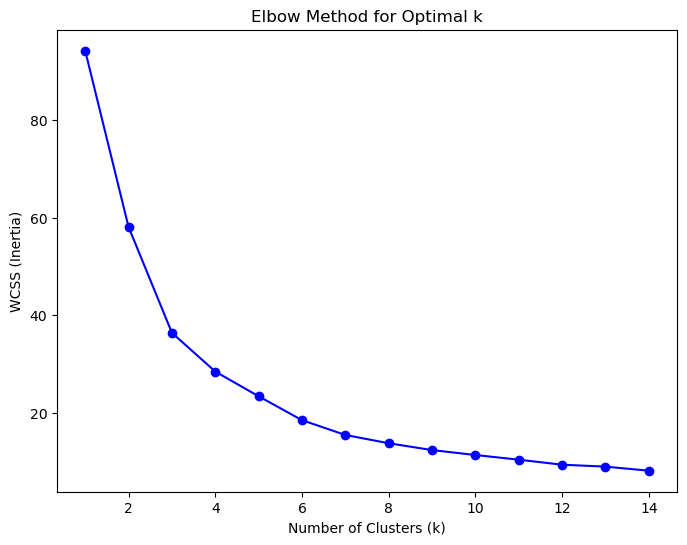

In [36]:
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suppress warnings
warnings.filterwarnings('ignore')

# List to store WCSS values for different k values
wcss = []

# Loop over different values of k to calculate WCSS
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(normalized_X)  # Normalized features
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

#### Observations
Selecting k = 6

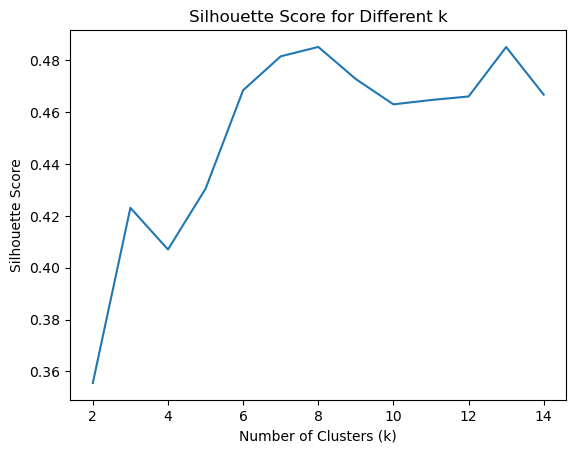

In [38]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(normalized_X)
    score = silhouette_score(normalized_X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 15), silhouette_scores)
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


#### Observations
A Silhouette Score of 0.48 at 𝑘=8 <br/>
It suggests that the clusters are somewhat well-defined, but not perfectly. Generally, a score above 0.5 is considered good, but values between 0.25 and 0.5 are still usable for clustering, particularly in cases where the data isn't highly separable. <br/>
A Silhouette Score of 0.48 isn't perfect, but it indicates moderate clustering structure, so 𝑘=6 or 8 could be a reasonable choice.

### Fit the model and identify the clusters

In [41]:
# Set a fixed random_state to ensure reproducibility
random_state_value = 7
km_model = KMeans(n_clusters=6, init="k-means++", n_init=10, random_state=random_state_value)

# Fit the model and get the cluster predictions
clusters = km_model.fit_predict(normalized_X)

# Assign the clusters to the DataFrame
normalized_X['Cluster'] = clusters

In [42]:
clusters.size

662

In [43]:
normalized_X.groupby(['Cluster']).size()

Cluster
0     34
1    100
2    128
3     97
4    119
5    184
dtype: int64

### Analyzing clusters

In [45]:
# Stats
cluster_stats = normalized_X.groupby('Cluster').agg(['mean','std'])

In [46]:
cluster_stats

HL                  OC           90D_Rolling_Volatility  \
             mean       std      mean       std                   mean   
Cluster                                                                  
0        0.426718  0.182782  0.546250  0.178592               0.397543   
1        0.029980  0.022731  0.505905  0.017039               0.314118   
2        0.074926  0.043852  0.506994  0.034714               0.487244   
3        0.120616  0.052873  0.515214  0.048117               0.098654   
4        0.051977  0.037370  0.509837  0.026889               0.847677   
5        0.059568  0.043390  0.508300  0.029329               0.543319   

                  Rolling_Beta              Volume            
              std         mean       std      mean       std  
Cluster                                                       
0        0.074326     0.361339  0.059986  0.231088  0.172706  
1        0.082689     0.060076  0.051550  0.057716  0.033627  
2        0.157530     0.819032  0.082424  0.126507  0.108875  
3        0.059380     0.287094  0.044509  0.087254  0.041552  
4        0.081210     0.371387  0.070631  0.099470  0.083342  
5        0.076582     0.335514  0.098493  0.085827  0.076327

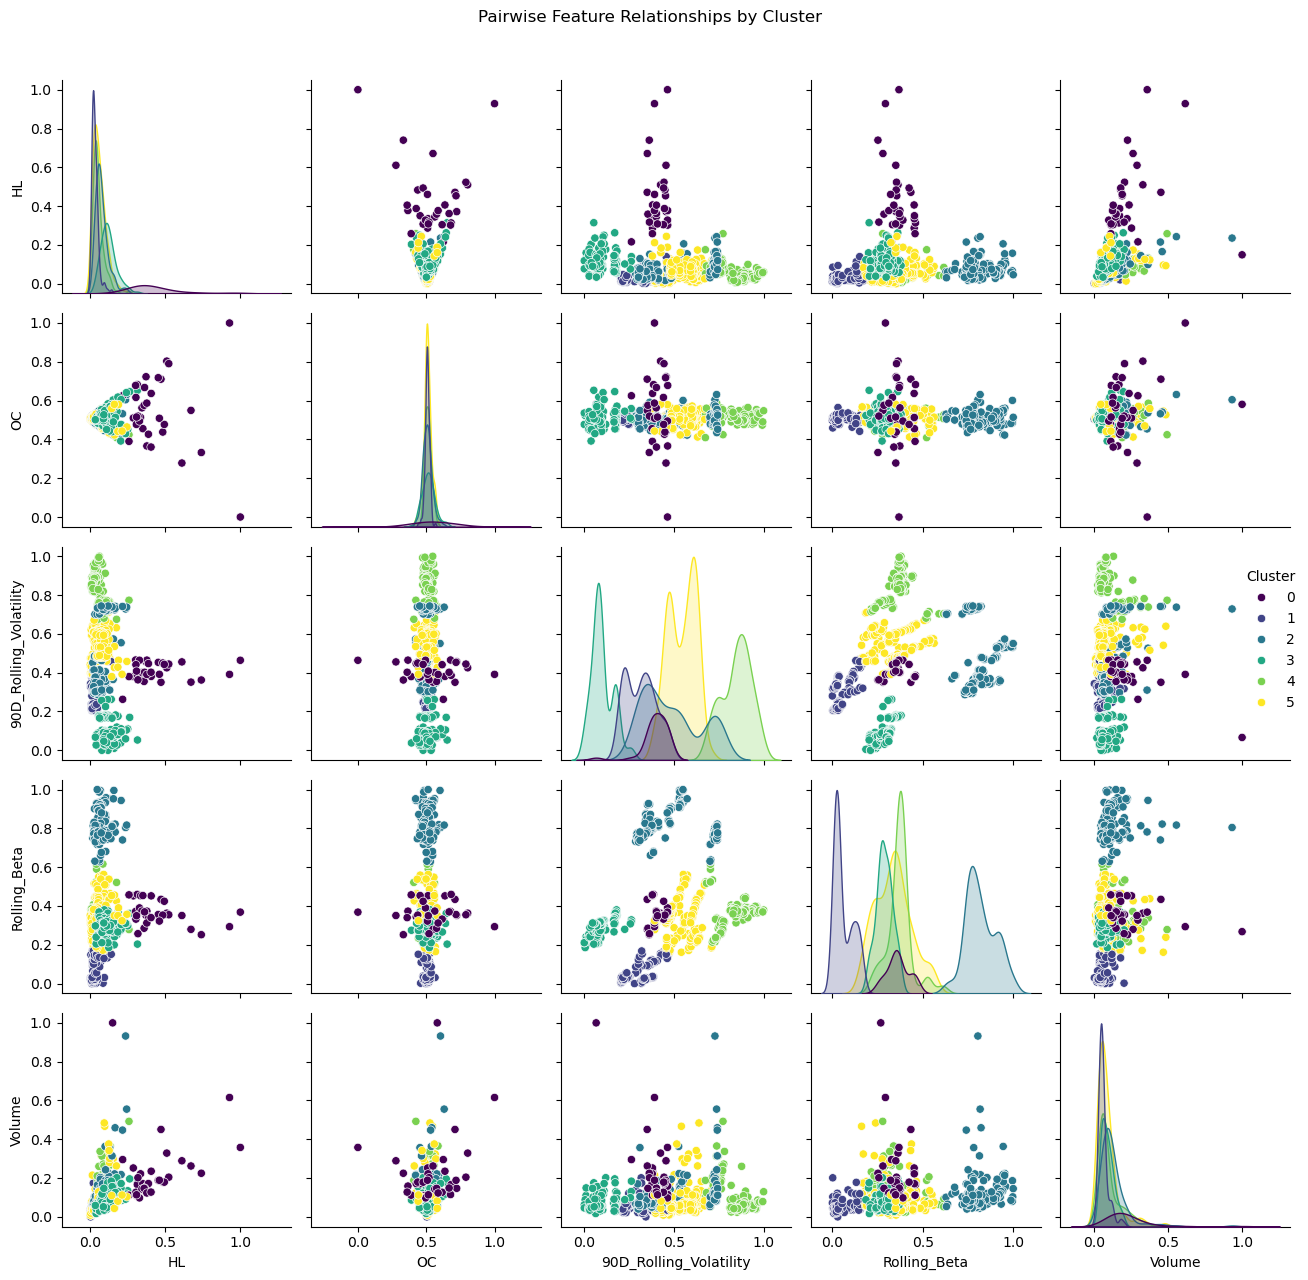

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with hue as the cluster label
sns.pairplot(normalized_X, hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Feature Relationships by Cluster', y=1.02)
plt.tight_layout()
plt.show()


In [48]:
# Save normalized_X DataFrame to CSV
normalized_X.to_csv('Clusters.csv', index=True)

### Analyzing each cluster

In [50]:
# analyze each cluster
C2=normalized_X.loc[(normalized_X['Cluster']==0)].describe() #use 1,2,3.. to view the clusters
C2

,HL,OC,90D_Rolling_Volatility,Rolling_Beta,Volume,Cluster
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.426718,0.546250,0.397543,0.361339,0.231088,0.0
std,0.182782,0.178592,0.074326,0.059986,0.172706,0.0
min,0.149024,0.000000,0.066280,0.252051,0.097881,0.0
25%,0.314491,0.460855,0.379138,0.328514,0.144352,0.0
50%,0.374203,0.534935,0.401649,0.355449,0.179196,0.0
75%,0.480087,0.659857,0.449062,0.386008,0.247876,0.0
max,1.000000,1.000000,0.465344,0.459768,1.000000,0.0


In [58]:
# Create the Markov transition matrix
transition_matrix = states.pivot(index="start_state", columns="end_state", values="percent").fillna(0)

In [59]:
transition_matrix

end_state,0,1,2,3,4,5
start_state,,,,,,
0,3.933434,0.000000,0.000000,0.302572,0.000000,0.756430
1,0.000000,14.523449,0.000000,0.000000,0.000000,0.605144
2,0.000000,0.000000,19.213313,0.000000,0.000000,0.151286
3,0.453858,0.000000,0.000000,14.220877,0.000000,0.000000
4,0.000000,0.000000,0.151286,0.000000,17.246596,0.605144
5,0.756430,0.605144,0.000000,0.151286,0.605144,25.718608
